In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('diabetes.csv')
df.isnull().sum()
df.describe()
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

# df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize=(10, 8))
# plt.show()



Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [25]:
.for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[column].replace(0, df[column].median(), inplace=True)

In [27]:
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [29]:
import pandas as pd
import numpy as np

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")

# Replace zero values with NaN for relevant attributes
attributes_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[attributes_to_impute] = df[attributes_to_impute].replace(0, np.nan)

# Impute missing values with the mean
df.fillna(df.mean(), inplace=True)

# Verify that missing values are handled
print(df.isnull().sum())

Number of times pregnant      0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")

# Assume 'Insulin' is our dependent variable with missing values
# Other attributes (e.g., Glucose, BMI) are predictors
predictors = ["Glucose", "BMI"]

# Create a subset with complete data for predictors
df_complete = df.dropna(subset=predictors)

# Fit a linear regression model to predict 'Insulin' using predictors
regressor = LinearRegression()
regressor.fit(df_complete[predictors], df_complete["Insulin"])

# Impute missing 'Insulin' values using the regression model
imputer = SimpleImputer(strategy="mean")
df["Insulin"] = imputer.fit_transform(df[predictors])

# Verify that missing values are handled
print(df.isnull().sum())


Number of times pregnant      0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64


In [35]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [174]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

In [51]:
df.isnull().sum()

Number of times pregnant      0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

In [221]:
x=df.drop(columns='Insulin')

/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


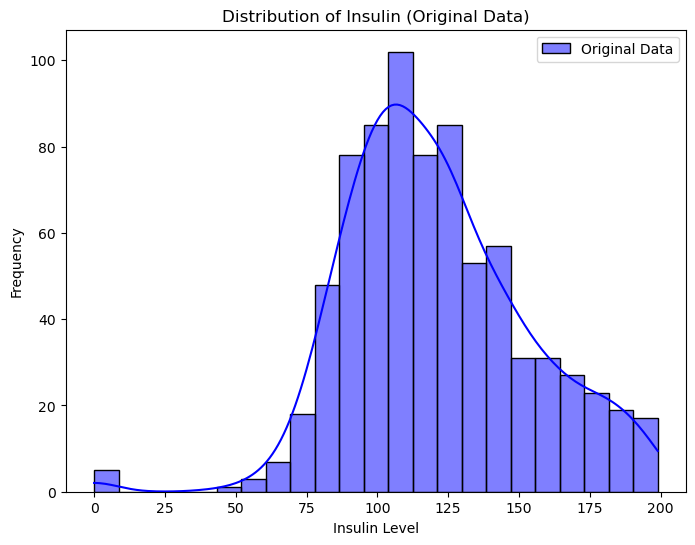

In [222]:
y=df["Insulin"]
# Original 'Insulin' distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], kde=True, color='blue', label='Original Data')
plt.title("Distribution of Insulin (Original Data)")
plt.xlabel("Insulin Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=23)


In [224]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [225]:
lr.fit(x_train,y_train)

LinearRegression()

In [226]:
y_pred_train=lr.predict(x_train)

Text(0, 0.5, 'Predicted charges')

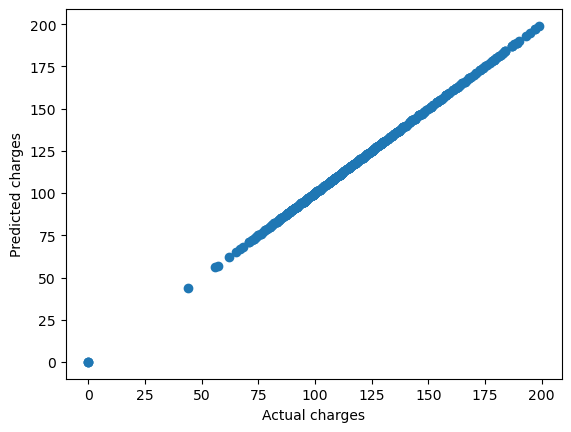

In [227]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')

In [228]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

1.0

In [229]:
y_pred_test=lr.predict(x_test)

Text(0, 0.5, 'Predicted charges')

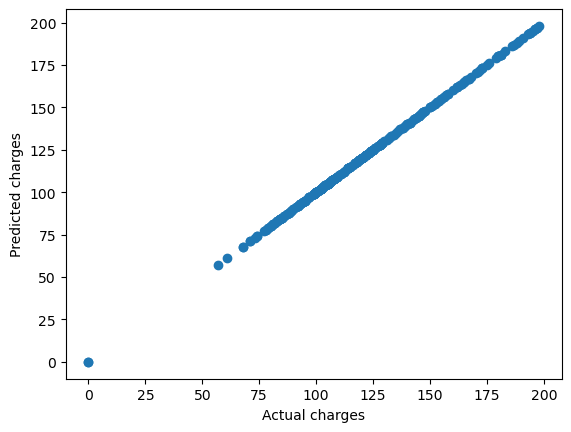

In [230]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
y_pred_trials
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')

In [217]:
r2_score(y_test,y_pred_test)

1.0

/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


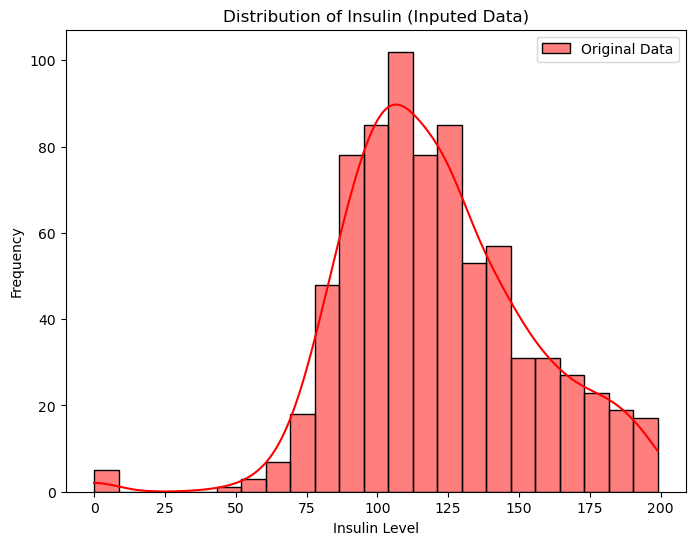

In [234]:
from sklearn.impute import SimpleImputer
# Impute missing 'Insulin' values using the regression model
imputer = SimpleImputer(strategy="mean")
df["Insulin"] = imputer.fit_transform(df[predictors])


# Original 'Insulin' distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], kde=True, color='red', label='Original Data')
plt.title("Distribution of Insulin (Inputed Data)")
plt.xlabel("Insulin Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


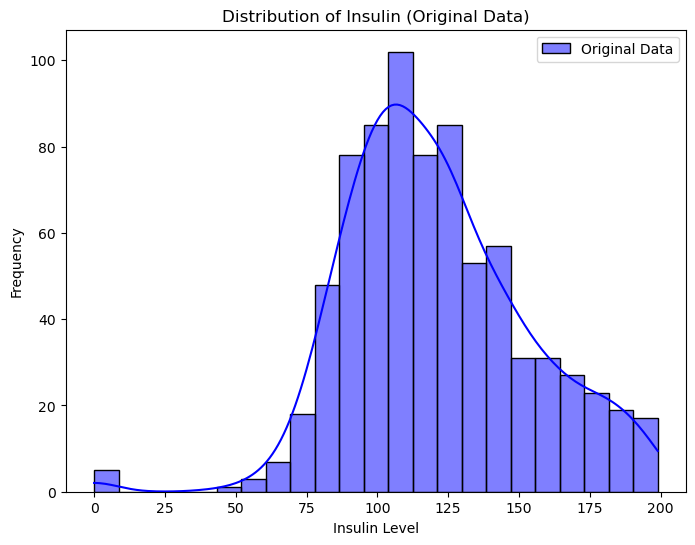

In [232]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

# test_data=df['Insulin']

test_data=df.drop("Insulin")

# drop the null values from the dataframe and consider as train data

df.dropna(inplace=True)
df.isnull().sum()

df.shape

# create x_train and y_train from the df['Age'] with non null values
y_train=df['Insulin']
y_train.shape

x_train=df.drop("Insulin",axis=1)
x_train.shape

# Build the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# train the model on the train dataset(x_train,y_train)
lr.fit(x_train,y_train)

# create x_test from the the test_data
# x_test=test_data.drop("Insulin",axis=1)
x_test=test_data
x_test.shape
test_data

# Apply the model on x_test and predicting the missing values
# y_pred=lr.predict(x_test)
# y_pred

KeyError: "['Insulin'] not found in axis"